<a href="https://colab.research.google.com/github/Hitanshuser50/ML/blob/main/SMP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
!pip install quandl
import quandl

In [63]:
# import quandl
# from datetime import date, timedelta

# # Get yesterday's date
# yesterday = date.today() - timedelta(days=1)
# # Get data from Quandl for the specified date range
# data = quandl.get("NSE/NHPC", start_date="2023-01-01", end_date=yesterday)

# # Print the data
# print(data)

In [64]:
!pip install tradingview-ta
import tradingview_ta

In [65]:
#data = quandl.get("NSC/stockname")
data = quandl.get("NSE/NHPC")
#data = quandl.get("NSE/NHPC", start_date=2003-11-11, end_date=2024-11-28)

In [66]:

data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2009-09-01,42.00,42.00,36.65,36.80,36.75,508832326.0,190198.13
2009-09-02,36.45,37.60,35.75,36.35,36.35,93326373.0,34304.95
2009-09-03,36.50,37.20,36.00,36.10,36.10,56420302.0,20520.27
2009-09-04,36.75,36.75,34.30,35.30,35.25,85231353.0,29980.98
2009-09-07,35.45,35.75,34.50,34.55,34.60,57610114.0,20025.39


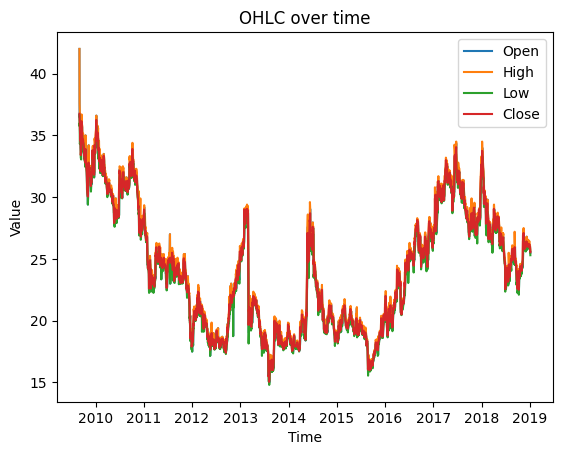

In [67]:
# @title OHLC over time

import matplotlib.pyplot as plt
plt.plot(data['Open'], label='Open')
plt.plot(data['High'], label='High')
plt.plot(data['Low'], label='Low')
plt.plot(data['Close'], label='Close')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('OHLC over time')
_ = plt.legend()

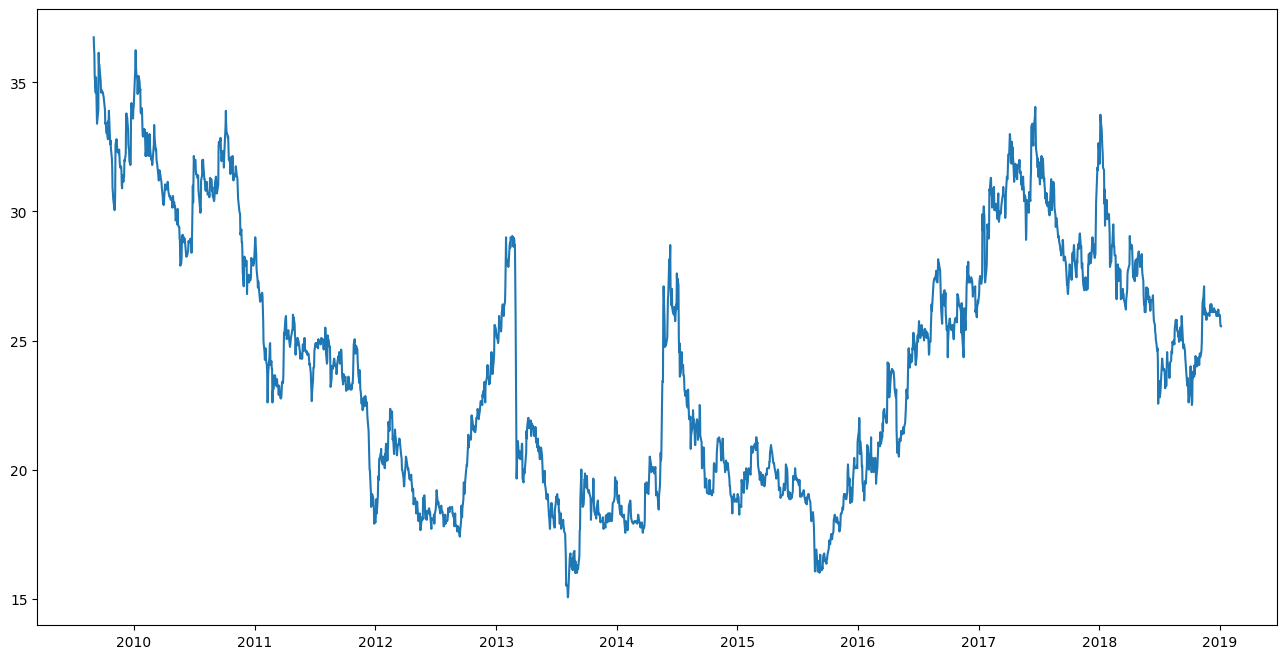

In [68]:
plt.figure(figsize = (16,8))
plt.plot(data['Close'], label = 'Closing Price')

In [69]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

In [70]:
x = data[['Open - Close','High - Low']]
x.head(10)

,Open - Close,High - Low
Date,,
2009-09-01,5.25,5.35
2009-09-02,0.10,1.85
2009-09-03,0.40,1.20
2009-09-04,1.50,2.45
2009-09-07,0.85,1.25
2009-09-08,-0.50,1.45
2009-09-09,0.75,1.00
2009-09-10,1.00,1.15
2009-09-11,0.60,1.15


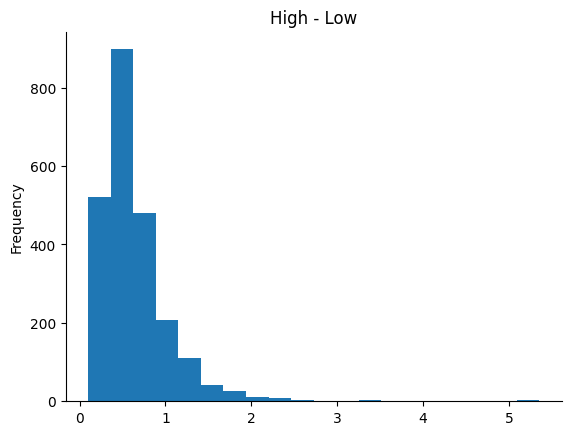

In [71]:
# @title High - Low

from matplotlib import pyplot as plt
x['High - Low'].plot(kind='hist', bins=20, title='High - Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

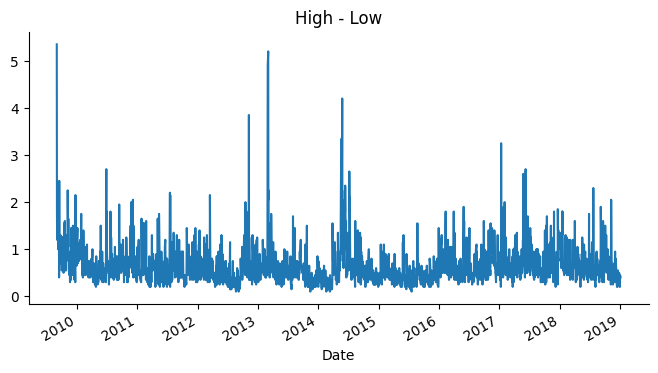

In [72]:
# @title High - Low

from matplotlib import pyplot as plt
x['High - Low'].plot(kind='line', figsize=(8, 4), title='High - Low')
plt.gca().spines[['top', 'right']].set_visible(False)

In [73]:
y = np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [74]:
y


array([-1, -1, -1, ..., -1, -1, -1])

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=55)

In [76]:
#%run ../utils/list_pyfiles.ipy--just a test to render the files using https://nbviewer.org/

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [78]:
#using GridSearchCV to find the best parameter
pms = {'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model =  GridSearchCV(knn, pms, cv=5)

In [79]:
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [80]:

#Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

print("Train Data Accuracy: %.2f" %accuracy_train)
print("Test Data Accuracy: %.2f" %accuracy_test)

Train Data Accuracy: 0.68
Test Data Accuracy: 0.52


In [81]:
predictions_classification =  model.predict(x_test)
predictions_classification

array([ 1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,
        1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1

In [82]:

actual_predictive_data = pd.DataFrame({'Actual Class' : y_test , 'Predicted Class' : predictions_classification})
actual_predictive_data.head(10)

,Actual Class,Predicted Class
0,-1,1
1,-1,-1
2,1,-1
3,-1,-1
4,1,-1
5,1,-1
6,1,-1
7,-1,-1
8,1,-1
9,1,1


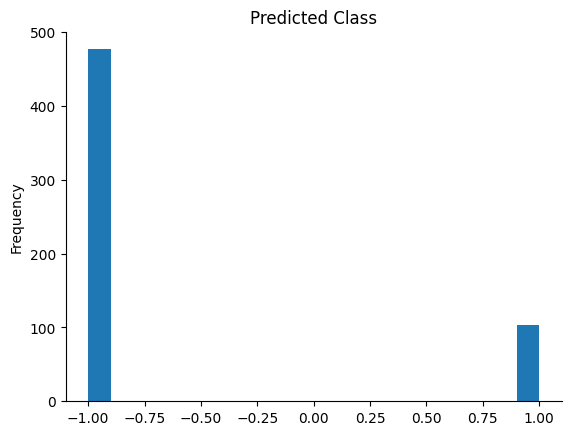

In [83]:
# @title Predicted Class

from matplotlib import pyplot as plt
actual_predictive_data['Predicted Class'].plot(kind='hist', bins=20, title='Predicted Class')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [84]:

y = data['Close']
y

Date
2009-09-01    36.75
2009-09-02    36.35
2009-09-03    36.10
2009-09-04    35.25
2009-09-07    34.60
              ...  
2018-12-31    26.00
2019-01-01    25.95
2019-01-02    25.65
2019-01-03    25.55
2019-01-04    25.55
Name: Close, Length: 2318, dtype: float64

**Regression By KNN**

*Implementation of KNN Regressor*

In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [86]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.25, random_state=42)

# Using GridSearchCV to find the best parameter
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
knn_reg = KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

# Reshape y_train_reg and y_test_reg to be 1D arrays
y_train_reg = y_train_reg.values.ravel()
y_test_reg = y_test_reg.values.ravel()
y_train_reg = y_train_reg.reshape(-1, 1)
print(x_train_reg.shape, y_train_reg.shape)

# Fit the model
model_reg.fit(x_train_reg, y_train_reg)

# Access the best parameter
best_n_neighbors = model_reg.best_params_['n_neighbors']

# Continue with your predictions or evaluation
predictions_reg = model_reg.predict(x_test_reg)


(1738, 2) (1738, 1)


In [87]:

print(predictions_reg)

[[23.01785714]
 [22.34285714]
 [27.69285714]
 [25.32142857]
 [22.15357143]
 [28.16428571]
 [24.63571429]
 [26.50714286]
 [22.51428571]
 [20.78928571]
 [24.98214286]
 [26.90357143]
 [25.39285714]
 [23.70714286]
 [22.325     ]
 [23.28214286]
 [22.40357143]
 [28.67142857]
 [27.61428571]
 [21.22142857]
 [25.18928571]
 [20.44642857]
 [24.68571429]
 [23.6       ]
 [19.57142857]
 [21.83928571]
 [22.43571429]
 [22.51428571]
 [28.025     ]
 [21.22142857]
 [27.52857143]
 [25.98214286]
 [26.48571429]
 [23.875     ]
 [25.47857143]
 [27.19642857]
 [20.2       ]
 [26.05714286]
 [24.175     ]
 [25.43571429]
 [25.51071429]
 [24.975     ]
 [24.91071429]
 [21.62142857]
 [20.44642857]
 [23.475     ]
 [22.12857143]
 [27.30714286]
 [26.45714286]
 [24.78214286]
 [25.69285714]
 [28.075     ]
 [19.875     ]
 [18.41428571]
 [22.51428571]
 [26.08571429]
 [19.19642857]
 [22.33214286]
 [24.36785714]
 [21.275     ]
 [21.275     ]
 [22.12857143]
 [20.17142857]
 [24.06071429]
 [21.81428571]
 [27.97857143]
 [27.775  

In [88]:
from sklearn.metrics import mean_squared_error
import numpy as np


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reg, predictions_reg)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 4.7297748536538355


In [89]:

valid = pd.DataFrame({'Actual Close': y_test_reg.ravel(), 'Predicted Close Value': predictions_reg.ravel()})
valid.head()


,Actual Close,Predicted Close Value
0,18.50,23.017857
1,23.60,22.342857
2,33.20,27.692857
3,18.25,25.321429
4,31.35,22.153571


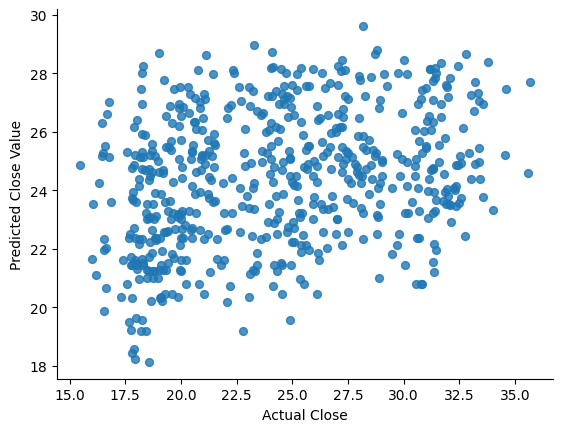

In [90]:
# @title Actual Close vs Predicted Close Value

from matplotlib import pyplot as plt
valid.plot(kind='scatter', x='Actual Close' , y='Predicted Close Value' , s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

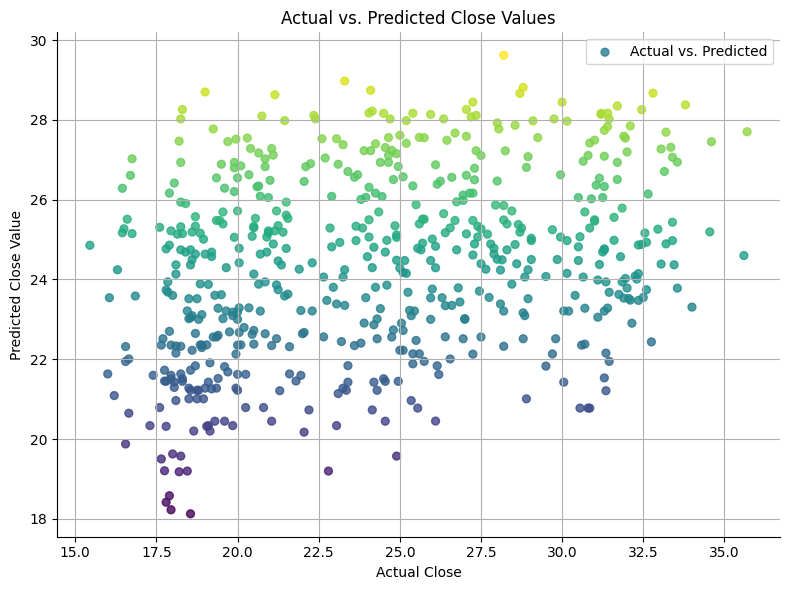

In [91]:


# import matplotlib.pyplot as plt
# import pandas as pd  # Assuming valid is a pandas DataFrame

# Extract data from valid DataFrame
actual_close = valid['Actual Close']
predicted_close = valid['Predicted Close Value']

# Create the scatter plot with individual colors
plt.figure(figsize=(8, 6))
plt.scatter(actual_close, predicted_close, label='Actual vs. Predicted', s=32, alpha=0.8, c=predicted_close, cmap='viridis')

# Add labels and title
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close Value')
plt.title('Actual vs. Predicted Close Values')

# Remove unnecessary spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Add legend for clarity
plt.legend()

# Display the plot
plt.grid(True)  # Add grid for better readability (optional)
plt.tight_layout()
plt.show()
